# <center><font color = "green">PUBG Game Prediction</font></center>

<center><img src = "https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif"></center>

### Table Content 

1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrangle)
4. [Feature Engineering](#feature)
5. [ML - CatBoost Model](#cat)

# <font color = "green">Importing Libraries</font><a class = "anchor" id = "import"></a>

In [1]:

# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<b>command for terminal</b>

- pip install catboost 
- conda install -c conda-forge catboost

<b>command for jupyter</b>

- !pip install catboost 

# <font color = "green">Reading the Data </font><a class = "anchor" id = "read"></a>

In [2]:
# load the data
df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [3]:
# glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# data dimension
df.shape

(4446966, 29)

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Descritption

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# <font color = "green">Data Wrangling</font><a class = "anchor" id = "wrangle"></a>

#### Check for the rows with missing win prediction value 

In [6]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# remove the data row
df.drop(2744604, inplace = True)
# df = df.drop(2744604)

#### Understanding Players distribution in a game

In [8]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [9]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


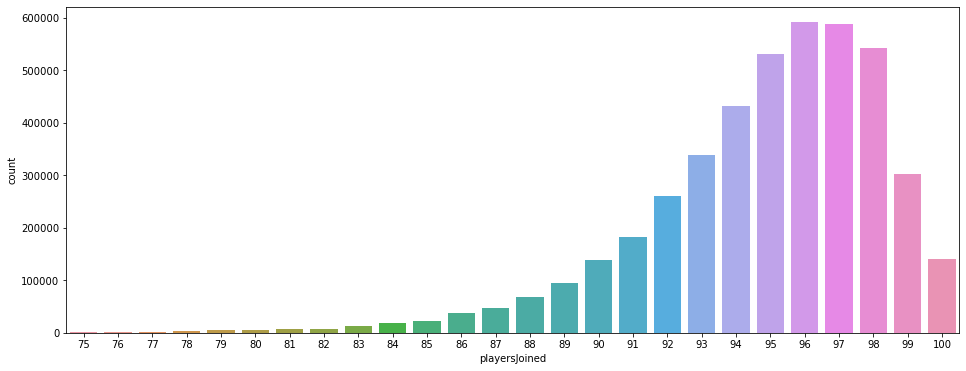

In [10]:
sns.countplot(df[df['playersJoined']>=75]['playersJoined'])
plt.show()

## Analysing the data

##### Kills Without Moving?

<center><img src = "https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>

In [11]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [12]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [13]:
df[df['killswithoutMoving'] == True].shape

(1535, 32)

In [14]:
# drop the table
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

<center><img src = "https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>

In [15]:
df[df['roadKills'] > 5].shape

(46, 32)

In [16]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

#### So many KILLS - how ????

<center><img src = "https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif"></center>

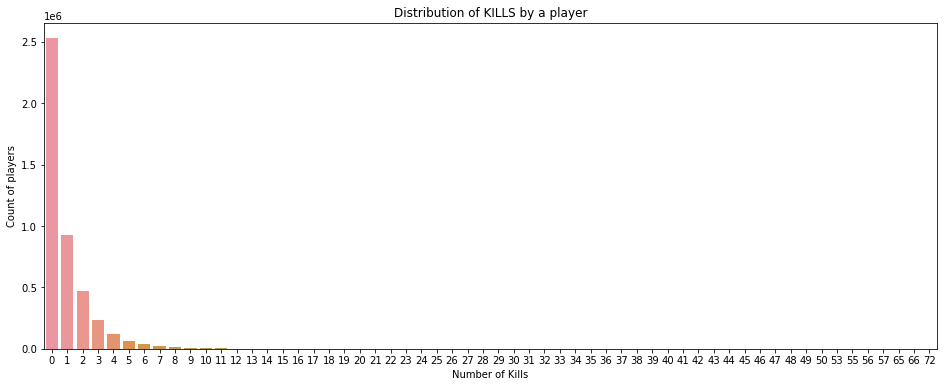

In [17]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

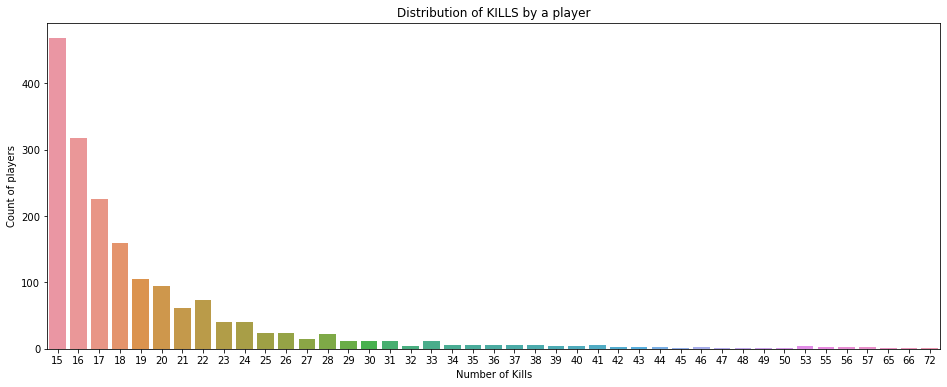

In [18]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [19]:
# data dimension
df[df['kills'] > 20].shape

(417, 32)

In [20]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

#### Head Shot

<center><img src = "https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif"></center>

In [21]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

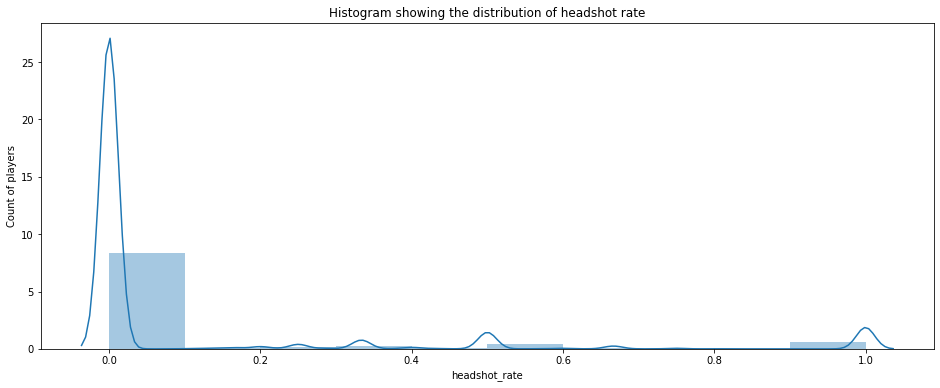

In [22]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


In [23]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [24]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

#### Longest Shot

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

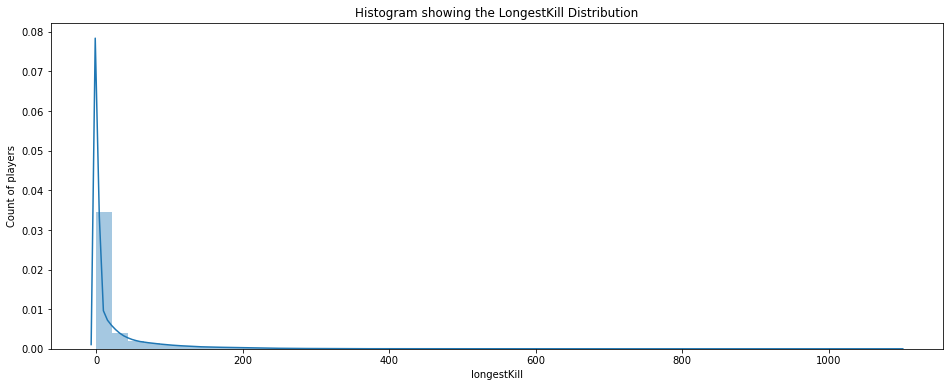

In [25]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [26]:
df[df['longestKill']>=500].shape

(1747, 33)

In [27]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

#### Weapon Change

<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

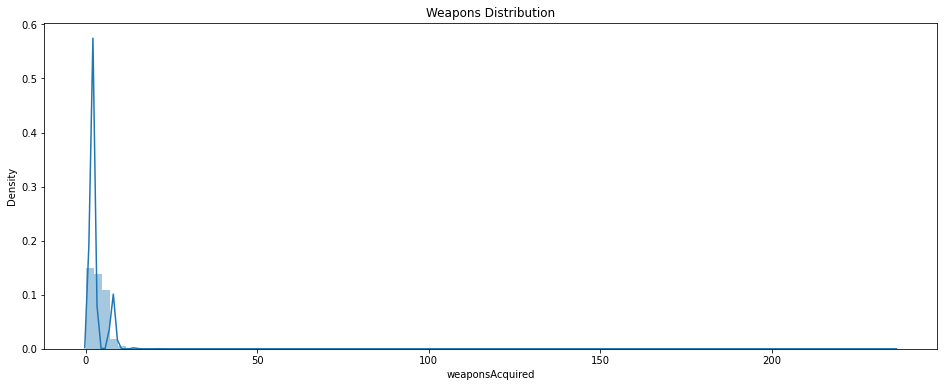

In [28]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [29]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [30]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

### EDA

In [31]:
df.shape

(4436306, 33)

In [32]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

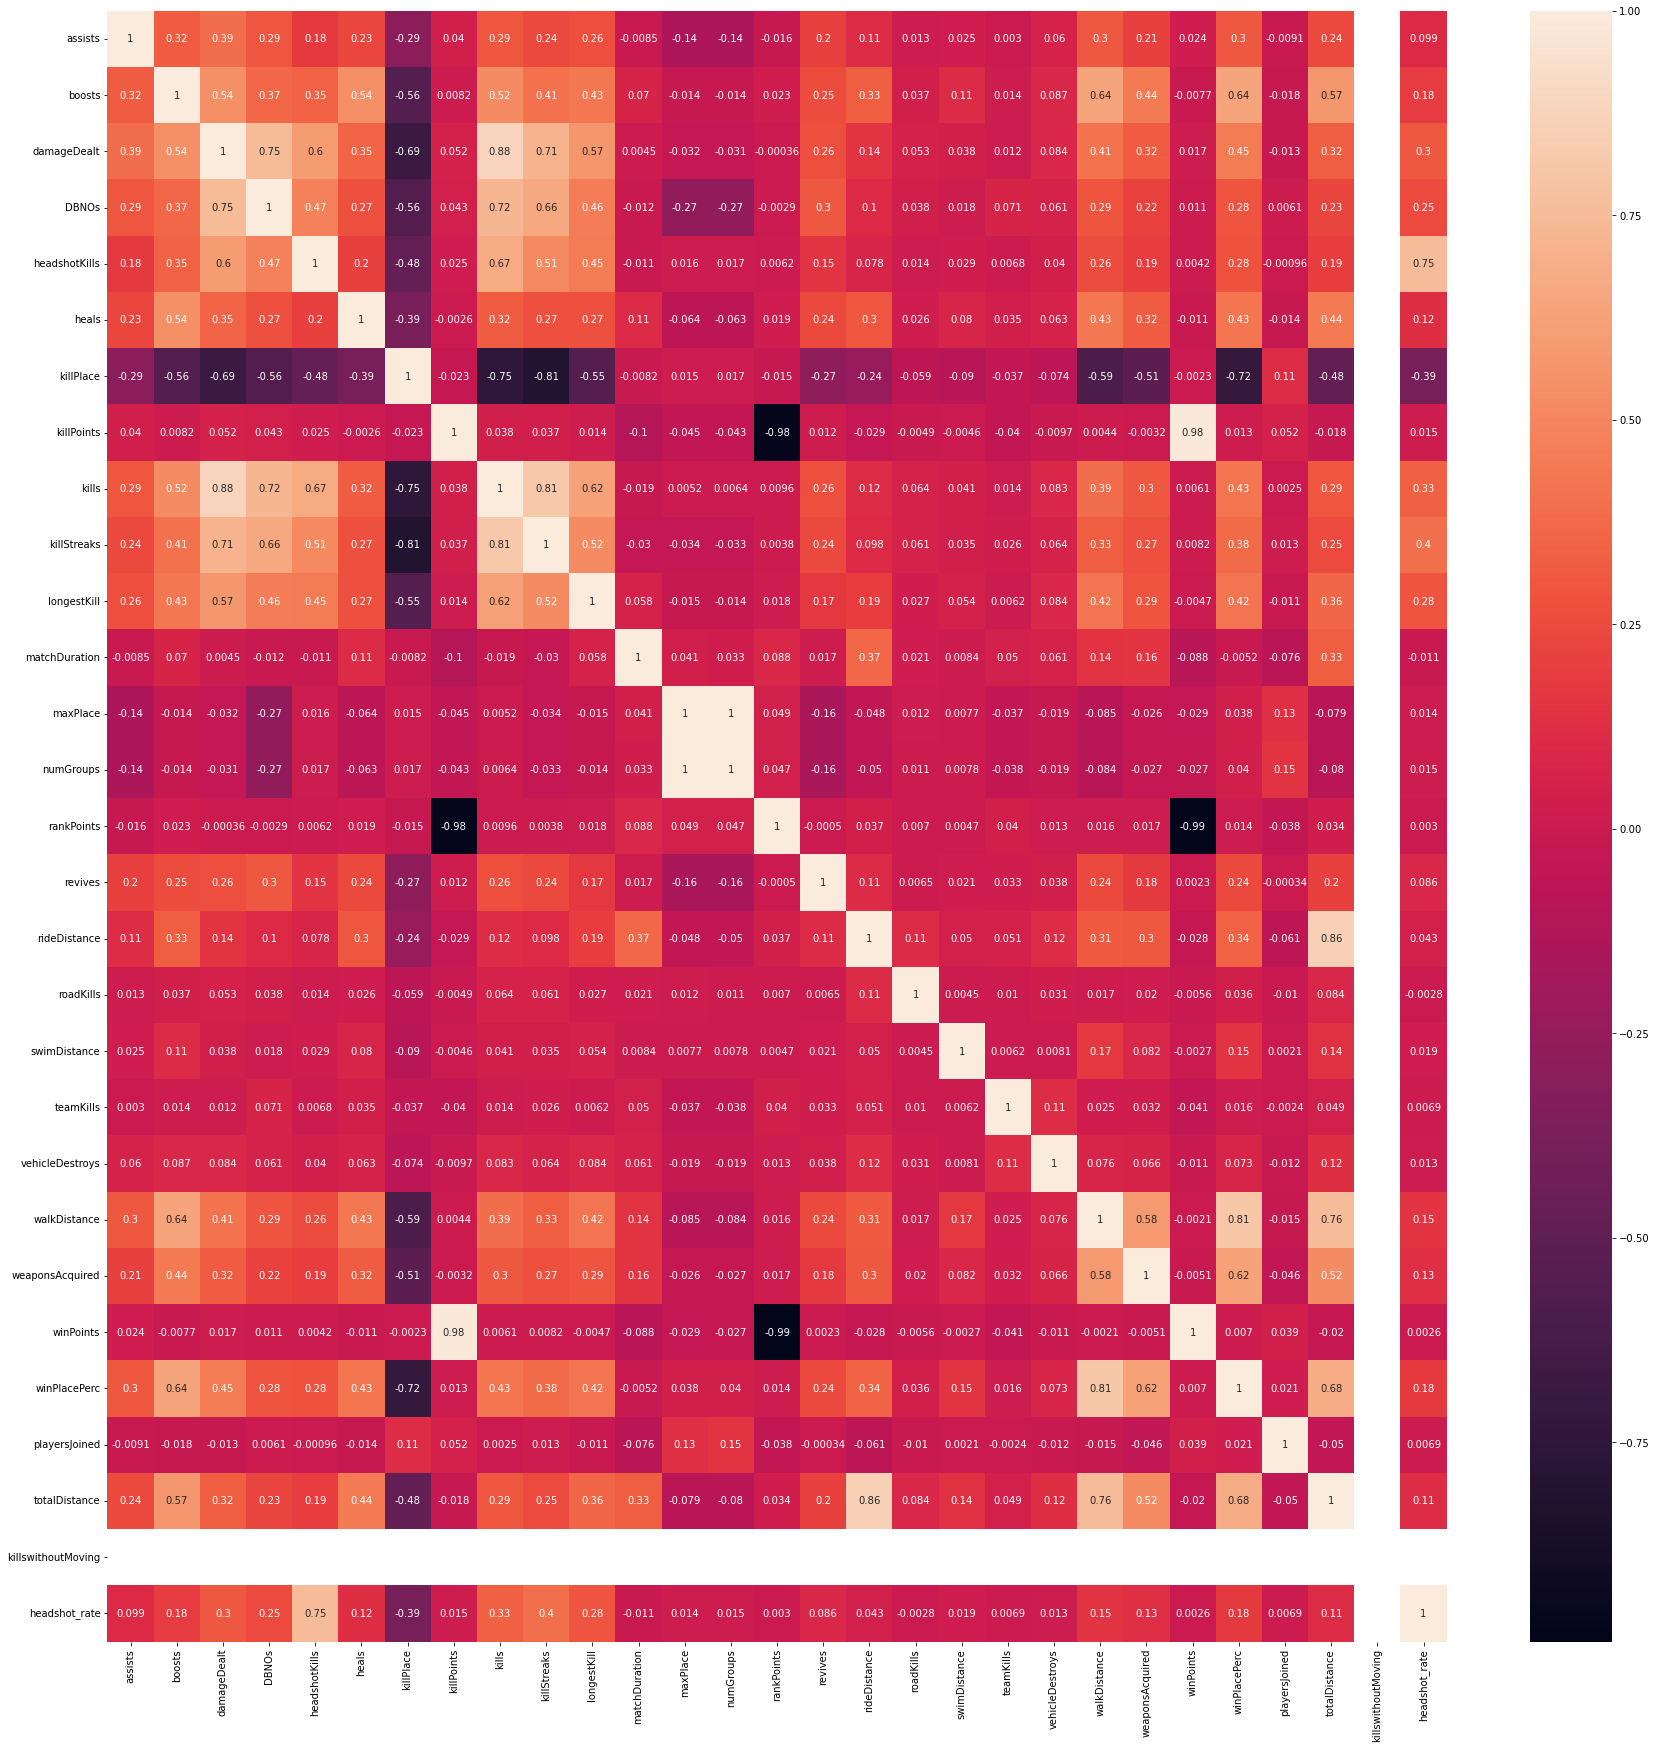

In [33]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

# <font color = "green">Feature Engineering</font><a class = "anchor" id = "feature"></a>

In [34]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [35]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [36]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [37]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [38]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# <font color = "green">ML - Catboost Model</font><a class = "anchor" id = "cat"></a>

#### Handling categorical data

In [39]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [40]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [41]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
x.shape

(4436306, 40)

In [43]:
features = x.columns

#### Scaling the data

In [44]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [45]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


#### Splitting data

In [46]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [47]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


## CatBoost Model

In [48]:
import catboost as cb

In [49]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [50]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [51]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 302ms	remaining: 29.9s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 435ms	remaining: 21.3s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 560ms	remaining: 18.1s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 851ms	remaining: 20.4s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 969ms	remaining: 18.4s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.1s	remaining: 17.2s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.22s	remaining: 16.2s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.34s	remaining: 15.4s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.48s	remaining: 15s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 1.61s	remaining: 14.5s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 1.73s	remaining: 14s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (11)

94:	learn: 0.1398785	test: 0.1399700	best: 0.1399700 (94)	total: 11.4s	remaining: 598ms
95:	learn: 0.1394478	test: 0.1395405	best: 0.1395405 (95)	total: 11.5s	remaining: 477ms
96:	learn: 0.1390753	test: 0.1391697	best: 0.1391697 (96)	total: 11.6s	remaining: 357ms
97:	learn: 0.1387199	test: 0.1388151	best: 0.1388151 (97)	total: 11.7s	remaining: 238ms
98:	learn: 0.1383766	test: 0.1384732	best: 0.1384732 (98)	total: 11.8s	remaining: 119ms
99:	learn: 0.1380397	test: 0.1381367	best: 0.1381367 (99)	total: 11.9s	remaining: 0us

bestTest = 0.1381366755
bestIteration = 99

0:	loss: 0.1381367	best: 0.1381367 (0)	total: 13.8s	remaining: 3m 26s
0:	learn: 0.5126068	test: 0.5124096	best: 0.5124096 (0)	total: 117ms	remaining: 11.6s
1:	learn: 0.4671679	test: 0.4669991	best: 0.4669991 (1)	total: 230ms	remaining: 11.3s
2:	learn: 0.4264429	test: 0.4262951	best: 0.4262951 (2)	total: 334ms	remaining: 10.8s
3:	learn: 0.3902182	test: 0.3900853	best: 0.3900853 (3)	total: 435ms	remaining: 10.4s
4:	learn: 0.358

87:	learn: 0.1175203	test: 0.1177555	best: 0.1177555 (87)	total: 9.82s	remaining: 1.34s
88:	learn: 0.1174285	test: 0.1176647	best: 0.1176647 (88)	total: 9.93s	remaining: 1.23s
89:	learn: 0.1171031	test: 0.1173483	best: 0.1173483 (89)	total: 10s	remaining: 1.11s
90:	learn: 0.1170075	test: 0.1172519	best: 0.1172519 (90)	total: 10.2s	remaining: 1s
91:	learn: 0.1169191	test: 0.1171636	best: 0.1171636 (91)	total: 10.3s	remaining: 893ms
92:	learn: 0.1168242	test: 0.1170669	best: 0.1170669 (92)	total: 10.4s	remaining: 783ms
93:	learn: 0.1167374	test: 0.1169829	best: 0.1169829 (93)	total: 10.5s	remaining: 672ms
94:	learn: 0.1166427	test: 0.1168850	best: 0.1168850 (94)	total: 10.6s	remaining: 560ms
95:	learn: 0.1165224	test: 0.1167628	best: 0.1167628 (95)	total: 10.8s	remaining: 449ms
96:	learn: 0.1164136	test: 0.1166544	best: 0.1166544 (96)	total: 10.9s	remaining: 337ms
97:	learn: 0.1163231	test: 0.1165631	best: 0.1165631 (97)	total: 11s	remaining: 225ms
98:	learn: 0.1162409	test: 0.1164784	be

80:	learn: 0.1473270	test: 0.1474090	best: 0.1474090 (80)	total: 9.26s	remaining: 7.89s
81:	learn: 0.1466753	test: 0.1467577	best: 0.1467577 (81)	total: 9.39s	remaining: 7.79s
82:	learn: 0.1459917	test: 0.1460750	best: 0.1460750 (82)	total: 9.51s	remaining: 7.68s
83:	learn: 0.1453945	test: 0.1454773	best: 0.1454773 (83)	total: 9.62s	remaining: 7.56s
84:	learn: 0.1448061	test: 0.1448892	best: 0.1448892 (84)	total: 9.73s	remaining: 7.44s
85:	learn: 0.1441889	test: 0.1442730	best: 0.1442730 (85)	total: 9.84s	remaining: 7.32s
86:	learn: 0.1436574	test: 0.1437424	best: 0.1437424 (86)	total: 9.94s	remaining: 7.2s
87:	learn: 0.1431242	test: 0.1432099	best: 0.1432099 (87)	total: 10s	remaining: 7.08s
88:	learn: 0.1425612	test: 0.1426476	best: 0.1426476 (88)	total: 10.2s	remaining: 6.96s
89:	learn: 0.1420826	test: 0.1421694	best: 0.1421694 (89)	total: 10.3s	remaining: 6.84s
90:	learn: 0.1416257	test: 0.1417131	best: 0.1417131 (90)	total: 10.4s	remaining: 6.74s
91:	learn: 0.1411888	test: 0.141278

22:	learn: 0.1488083	test: 0.1488995	best: 0.1488995 (22)	total: 2.83s	remaining: 15.6s
23:	learn: 0.1465172	test: 0.1466110	best: 0.1466110 (23)	total: 2.94s	remaining: 15.4s
24:	learn: 0.1445245	test: 0.1446326	best: 0.1446326 (24)	total: 3.04s	remaining: 15.2s
25:	learn: 0.1428209	test: 0.1429318	best: 0.1429318 (25)	total: 3.14s	remaining: 15s
26:	learn: 0.1411019	test: 0.1412206	best: 0.1412206 (26)	total: 3.25s	remaining: 14.8s
27:	learn: 0.1397763	test: 0.1398917	best: 0.1398917 (27)	total: 3.35s	remaining: 14.6s
28:	learn: 0.1385976	test: 0.1387311	best: 0.1387311 (28)	total: 3.45s	remaining: 14.4s
29:	learn: 0.1374581	test: 0.1375932	best: 0.1375932 (29)	total: 3.56s	remaining: 14.2s
30:	learn: 0.1362990	test: 0.1364387	best: 0.1364387 (30)	total: 3.68s	remaining: 14.1s
31:	learn: 0.1354159	test: 0.1355534	best: 0.1355534 (31)	total: 3.79s	remaining: 14s
32:	learn: 0.1346504	test: 0.1347928	best: 0.1347928 (32)	total: 3.9s	remaining: 13.8s
33:	learn: 0.1337834	test: 0.1339284	

116:	learn: 0.1137482	test: 0.1139813	best: 0.1139813 (116)	total: 13.4s	remaining: 3.79s
117:	learn: 0.1136866	test: 0.1139187	best: 0.1139187 (117)	total: 13.6s	remaining: 3.68s
118:	learn: 0.1135590	test: 0.1137919	best: 0.1137919 (118)	total: 13.7s	remaining: 3.56s
119:	learn: 0.1134379	test: 0.1136698	best: 0.1136698 (119)	total: 13.8s	remaining: 3.44s
120:	learn: 0.1133694	test: 0.1135985	best: 0.1135985 (120)	total: 13.9s	remaining: 3.33s
121:	learn: 0.1133185	test: 0.1135468	best: 0.1135468 (121)	total: 14s	remaining: 3.21s
122:	learn: 0.1132164	test: 0.1134445	best: 0.1134445 (122)	total: 14.1s	remaining: 3.1s
123:	learn: 0.1131634	test: 0.1133929	best: 0.1133929 (123)	total: 14.2s	remaining: 2.98s
124:	learn: 0.1128980	test: 0.1131247	best: 0.1131247 (124)	total: 14.4s	remaining: 2.87s
125:	learn: 0.1126908	test: 0.1129179	best: 0.1129179 (125)	total: 14.5s	remaining: 2.76s
126:	learn: 0.1125661	test: 0.1127893	best: 0.1127893 (126)	total: 14.6s	remaining: 2.64s
127:	learn: 0

58:	learn: 0.1565743	test: 0.1566936	best: 0.1566936 (58)	total: 9.3s	remaining: 6.46s
59:	learn: 0.1547252	test: 0.1548482	best: 0.1548482 (59)	total: 9.46s	remaining: 6.31s
60:	learn: 0.1529240	test: 0.1530538	best: 0.1530538 (60)	total: 9.62s	remaining: 6.15s
61:	learn: 0.1512431	test: 0.1513749	best: 0.1513749 (61)	total: 9.77s	remaining: 5.99s
62:	learn: 0.1496426	test: 0.1497763	best: 0.1497763 (62)	total: 9.91s	remaining: 5.82s
63:	learn: 0.1480579	test: 0.1481975	best: 0.1481975 (63)	total: 10s	remaining: 5.65s
64:	learn: 0.1465855	test: 0.1467283	best: 0.1467283 (64)	total: 10.2s	remaining: 5.49s
65:	learn: 0.1451749	test: 0.1453197	best: 0.1453197 (65)	total: 10.3s	remaining: 5.32s
66:	learn: 0.1437990	test: 0.1439497	best: 0.1439497 (66)	total: 10.5s	remaining: 5.17s
67:	learn: 0.1425113	test: 0.1426640	best: 0.1426640 (67)	total: 10.7s	remaining: 5.02s
68:	learn: 0.1412931	test: 0.1414479	best: 0.1414479 (68)	total: 10.8s	remaining: 4.86s
69:	learn: 0.1401193	test: 0.140276

52:	learn: 0.1057337	test: 0.1059811	best: 0.1059811 (52)	total: 8.2s	remaining: 7.27s
53:	learn: 0.1053066	test: 0.1055544	best: 0.1055544 (53)	total: 8.36s	remaining: 7.12s
54:	learn: 0.1051164	test: 0.1053633	best: 0.1053633 (54)	total: 8.5s	remaining: 6.96s
55:	learn: 0.1047146	test: 0.1049609	best: 0.1049609 (55)	total: 8.67s	remaining: 6.81s
56:	learn: 0.1043936	test: 0.1046379	best: 0.1046379 (56)	total: 8.83s	remaining: 6.66s
57:	learn: 0.1039827	test: 0.1042228	best: 0.1042228 (57)	total: 8.97s	remaining: 6.49s
58:	learn: 0.1036741	test: 0.1039153	best: 0.1039153 (58)	total: 9.13s	remaining: 6.34s
59:	learn: 0.1035171	test: 0.1037603	best: 0.1037603 (59)	total: 9.29s	remaining: 6.19s
60:	learn: 0.1033076	test: 0.1035475	best: 0.1035475 (60)	total: 9.43s	remaining: 6.03s
61:	learn: 0.1031737	test: 0.1034118	best: 0.1034118 (61)	total: 9.56s	remaining: 5.86s
62:	learn: 0.1030069	test: 0.1032452	best: 0.1032452 (62)	total: 9.71s	remaining: 5.7s
63:	learn: 0.1026722	test: 0.102911

46:	learn: 0.1861207	test: 0.1861755	best: 0.1861755 (46)	total: 7.73s	remaining: 16.9s
47:	learn: 0.1831541	test: 0.1832117	best: 0.1832117 (47)	total: 7.9s	remaining: 16.8s
48:	learn: 0.1802725	test: 0.1803352	best: 0.1803352 (48)	total: 8.07s	remaining: 16.6s
49:	learn: 0.1774256	test: 0.1774946	best: 0.1774946 (49)	total: 8.23s	remaining: 16.5s
50:	learn: 0.1747731	test: 0.1748430	best: 0.1748430 (50)	total: 8.4s	remaining: 16.3s
51:	learn: 0.1720982	test: 0.1721771	best: 0.1721771 (51)	total: 8.56s	remaining: 16.1s
52:	learn: 0.1696361	test: 0.1697189	best: 0.1697189 (52)	total: 8.71s	remaining: 15.9s
53:	learn: 0.1672795	test: 0.1673655	best: 0.1673655 (53)	total: 8.85s	remaining: 15.7s
54:	learn: 0.1649087	test: 0.1650046	best: 0.1650046 (54)	total: 9s	remaining: 15.5s
55:	learn: 0.1626477	test: 0.1627526	best: 0.1627526 (55)	total: 9.15s	remaining: 15.4s
56:	learn: 0.1605638	test: 0.1606708	best: 0.1606708 (56)	total: 9.3s	remaining: 15.2s
57:	learn: 0.1585607	test: 0.1586720	b

140:	learn: 0.1106114	test: 0.1108466	best: 0.1108466 (140)	total: 22.3s	remaining: 1.42s
141:	learn: 0.1103944	test: 0.1106285	best: 0.1106285 (141)	total: 22.5s	remaining: 1.27s
142:	learn: 0.1102008	test: 0.1104337	best: 0.1104337 (142)	total: 22.6s	remaining: 1.11s
143:	learn: 0.1100776	test: 0.1103110	best: 0.1103110 (143)	total: 22.8s	remaining: 949ms
144:	learn: 0.1099620	test: 0.1101960	best: 0.1101960 (144)	total: 22.9s	remaining: 791ms
145:	learn: 0.1098644	test: 0.1100969	best: 0.1100969 (145)	total: 23.1s	remaining: 632ms
146:	learn: 0.1097366	test: 0.1099716	best: 0.1099716 (146)	total: 23.2s	remaining: 473ms
147:	learn: 0.1095367	test: 0.1097692	best: 0.1097692 (147)	total: 23.3s	remaining: 315ms
148:	learn: 0.1092982	test: 0.1095318	best: 0.1095318 (148)	total: 23.5s	remaining: 158ms
149:	learn: 0.1090737	test: 0.1093082	best: 0.1093082 (149)	total: 23.7s	remaining: 0us

bestTest = 0.1093082154
bestIteration = 149

6:	loss: 0.1093082	best: 0.0958732 (5)	total: 1m 54s	rem

84:	learn: 0.0976298	test: 0.0978501	best: 0.0978501 (84)	total: 12.9s	remaining: 9.83s
85:	learn: 0.0974253	test: 0.0976420	best: 0.0976420 (85)	total: 13s	remaining: 9.67s
86:	learn: 0.0973126	test: 0.0975291	best: 0.0975291 (86)	total: 13.2s	remaining: 9.52s
87:	learn: 0.0970818	test: 0.0973001	best: 0.0973001 (87)	total: 13.3s	remaining: 9.38s
88:	learn: 0.0969424	test: 0.0971628	best: 0.0971628 (88)	total: 13.4s	remaining: 9.22s
89:	learn: 0.0967657	test: 0.0969827	best: 0.0969827 (89)	total: 13.6s	remaining: 9.05s
90:	learn: 0.0966662	test: 0.0968829	best: 0.0968829 (90)	total: 13.7s	remaining: 8.89s
91:	learn: 0.0966012	test: 0.0968178	best: 0.0968178 (91)	total: 13.8s	remaining: 8.72s
92:	learn: 0.0964290	test: 0.0966429	best: 0.0966429 (92)	total: 14s	remaining: 8.58s
93:	learn: 0.0962823	test: 0.0964993	best: 0.0964993 (93)	total: 14.2s	remaining: 8.44s
94:	learn: 0.0962033	test: 0.0964175	best: 0.0964175 (94)	total: 14.3s	remaining: 8.28s
95:	learn: 0.0961413	test: 0.0963548

26:	learn: 0.2729818	test: 0.2729849	best: 0.2729849 (26)	total: 5.8s	remaining: 15.7s
27:	learn: 0.2664793	test: 0.2664859	best: 0.2664859 (27)	total: 6s	remaining: 15.4s
28:	learn: 0.2601959	test: 0.2602075	best: 0.2602075 (28)	total: 6.22s	remaining: 15.2s
29:	learn: 0.2541062	test: 0.2541259	best: 0.2541259 (29)	total: 6.43s	remaining: 15s
30:	learn: 0.2482311	test: 0.2482559	best: 0.2482559 (30)	total: 6.63s	remaining: 14.8s
31:	learn: 0.2425636	test: 0.2425949	best: 0.2425949 (31)	total: 6.82s	remaining: 14.5s
32:	learn: 0.2371181	test: 0.2371546	best: 0.2371546 (32)	total: 7.01s	remaining: 14.2s
33:	learn: 0.2318326	test: 0.2318775	best: 0.2318775 (33)	total: 7.24s	remaining: 14.1s
34:	learn: 0.2267477	test: 0.2267978	best: 0.2267978 (34)	total: 7.5s	remaining: 13.9s
35:	learn: 0.2218379	test: 0.2218938	best: 0.2218938 (35)	total: 7.75s	remaining: 13.8s
36:	learn: 0.2170756	test: 0.2171393	best: 0.2171393 (36)	total: 8.01s	remaining: 13.6s
37:	learn: 0.2125406	test: 0.2126089	be

19:	learn: 0.1314803	test: 0.1316934	best: 0.1316934 (19)	total: 4.07s	remaining: 16.3s
20:	learn: 0.1274223	test: 0.1276467	best: 0.1276467 (20)	total: 4.26s	remaining: 16s
21:	learn: 0.1237700	test: 0.1239844	best: 0.1239844 (21)	total: 4.46s	remaining: 15.8s
22:	learn: 0.1207436	test: 0.1209668	best: 0.1209668 (22)	total: 4.67s	remaining: 15.6s
23:	learn: 0.1181650	test: 0.1183937	best: 0.1183937 (23)	total: 4.86s	remaining: 15.4s
24:	learn: 0.1159775	test: 0.1162142	best: 0.1162142 (24)	total: 5.05s	remaining: 15.2s
25:	learn: 0.1141011	test: 0.1143439	best: 0.1143439 (25)	total: 5.23s	remaining: 14.9s
26:	learn: 0.1121106	test: 0.1123619	best: 0.1123619 (26)	total: 5.43s	remaining: 14.7s
27:	learn: 0.1107154	test: 0.1109670	best: 0.1109670 (27)	total: 5.62s	remaining: 14.4s
28:	learn: 0.1094292	test: 0.1096875	best: 0.1096875 (28)	total: 5.81s	remaining: 14.2s
29:	learn: 0.1082860	test: 0.1085465	best: 0.1085465 (29)	total: 6s	remaining: 14s
30:	learn: 0.1071713	test: 0.1074365	be

12:	learn: 0.3920894	test: 0.3919864	best: 0.3919864 (12)	total: 2.64s	remaining: 27.8s
13:	learn: 0.3816098	test: 0.3815163	best: 0.3815163 (13)	total: 2.84s	remaining: 27.6s
14:	learn: 0.3714752	test: 0.3713921	best: 0.3713921 (14)	total: 3.06s	remaining: 27.5s
15:	learn: 0.3616552	test: 0.3615791	best: 0.3615791 (15)	total: 3.28s	remaining: 27.4s
16:	learn: 0.3521647	test: 0.3520952	best: 0.3520952 (16)	total: 3.47s	remaining: 27.2s
17:	learn: 0.3429798	test: 0.3429173	best: 0.3429173 (17)	total: 3.69s	remaining: 27.1s
18:	learn: 0.3341303	test: 0.3340735	best: 0.3340735 (18)	total: 3.89s	remaining: 26.8s
19:	learn: 0.3255881	test: 0.3255371	best: 0.3255371 (19)	total: 4.08s	remaining: 26.5s
20:	learn: 0.3173021	test: 0.3172580	best: 0.3172580 (20)	total: 4.29s	remaining: 26.4s
21:	learn: 0.3092648	test: 0.3092271	best: 0.3092271 (21)	total: 4.51s	remaining: 26.2s
22:	learn: 0.3014865	test: 0.3014565	best: 0.3014565 (22)	total: 4.75s	remaining: 26.2s
23:	learn: 0.2939546	test: 0.293

106:	learn: 0.1067565	test: 0.1069852	best: 0.1069852 (106)	total: 22.6s	remaining: 9.08s
107:	learn: 0.1064957	test: 0.1067232	best: 0.1067232 (107)	total: 22.8s	remaining: 8.85s
108:	learn: 0.1062381	test: 0.1064671	best: 0.1064671 (108)	total: 22.9s	remaining: 8.63s
109:	learn: 0.1059120	test: 0.1061418	best: 0.1061418 (109)	total: 23.1s	remaining: 8.41s
110:	learn: 0.1056145	test: 0.1058437	best: 0.1058437 (110)	total: 23.3s	remaining: 8.2s
111:	learn: 0.1053872	test: 0.1056176	best: 0.1056176 (111)	total: 23.5s	remaining: 7.98s
112:	learn: 0.1051611	test: 0.1053918	best: 0.1053918 (112)	total: 23.7s	remaining: 7.76s
113:	learn: 0.1049494	test: 0.1051792	best: 0.1051792 (113)	total: 23.9s	remaining: 7.54s
114:	learn: 0.1047422	test: 0.1049719	best: 0.1049719 (114)	total: 24.1s	remaining: 7.32s
115:	learn: 0.1045191	test: 0.1047493	best: 0.1047493 (115)	total: 24.2s	remaining: 7.11s
116:	learn: 0.1042499	test: 0.1044792	best: 0.1044792 (116)	total: 24.5s	remaining: 6.9s
117:	learn: 

49:	learn: 0.0961270	test: 0.0963525	best: 0.0963525 (49)	total: 9.82s	remaining: 19.6s
50:	learn: 0.0958597	test: 0.0960837	best: 0.0960837 (50)	total: 10s	remaining: 19.5s
51:	learn: 0.0955918	test: 0.0958163	best: 0.0958163 (51)	total: 10.2s	remaining: 19.3s
52:	learn: 0.0953328	test: 0.0955559	best: 0.0955559 (52)	total: 10.4s	remaining: 19.1s
53:	learn: 0.0951077	test: 0.0953340	best: 0.0953340 (53)	total: 10.6s	remaining: 18.8s
54:	learn: 0.0948662	test: 0.0950949	best: 0.0950949 (54)	total: 10.8s	remaining: 18.6s
55:	learn: 0.0946556	test: 0.0948824	best: 0.0948824 (55)	total: 11s	remaining: 18.4s
56:	learn: 0.0944447	test: 0.0946718	best: 0.0946718 (56)	total: 11.2s	remaining: 18.2s
57:	learn: 0.0941776	test: 0.0944023	best: 0.0944023 (57)	total: 11.3s	remaining: 18s
58:	learn: 0.0937143	test: 0.0939304	best: 0.0939304 (58)	total: 11.5s	remaining: 17.8s
59:	learn: 0.0935407	test: 0.0937607	best: 0.0937607 (59)	total: 11.7s	remaining: 17.5s
60:	learn: 0.0932168	test: 0.0934297	b

143:	learn: 0.0847443	test: 0.0849200	best: 0.0849200 (143)	total: 27.6s	remaining: 1.15s
144:	learn: 0.0846866	test: 0.0848636	best: 0.0848636 (144)	total: 27.7s	remaining: 956ms
145:	learn: 0.0846584	test: 0.0848366	best: 0.0848366 (145)	total: 27.9s	remaining: 764ms
146:	learn: 0.0846001	test: 0.0847795	best: 0.0847795 (146)	total: 28.1s	remaining: 573ms
147:	learn: 0.0845669	test: 0.0847466	best: 0.0847466 (147)	total: 28.2s	remaining: 382ms
148:	learn: 0.0845455	test: 0.0847256	best: 0.0847256 (148)	total: 28.4s	remaining: 191ms
149:	learn: 0.0845000	test: 0.0846790	best: 0.0846790 (149)	total: 28.6s	remaining: 0us

bestTest = 0.08467896813
bestIteration = 149

11:	loss: 0.0846790	best: 0.0846790 (11)	total: 3m 57s	remaining: 1m 19s
0:	learn: 0.5475834	test: 0.5473730	best: 0.5473730 (0)	total: 237ms	remaining: 23.5s
1:	learn: 0.5320795	test: 0.5318759	best: 0.5318759 (1)	total: 501ms	remaining: 24.6s
2:	learn: 0.5170910	test: 0.5168972	best: 0.5168972 (2)	total: 749ms	remaining: 

86:	learn: 0.1083847	test: 0.1086212	best: 0.1086212 (86)	total: 22s	remaining: 3.29s
87:	learn: 0.1077460	test: 0.1079831	best: 0.1079831 (87)	total: 22.3s	remaining: 3.04s
88:	learn: 0.1071269	test: 0.1073627	best: 0.1073627 (88)	total: 22.5s	remaining: 2.78s
89:	learn: 0.1066098	test: 0.1068455	best: 0.1068455 (89)	total: 22.7s	remaining: 2.53s
90:	learn: 0.1060513	test: 0.1062879	best: 0.1062879 (90)	total: 23s	remaining: 2.27s
91:	learn: 0.1055216	test: 0.1057572	best: 0.1057572 (91)	total: 23.2s	remaining: 2.02s
92:	learn: 0.1050588	test: 0.1052952	best: 0.1052952 (92)	total: 23.4s	remaining: 1.76s
93:	learn: 0.1046189	test: 0.1048562	best: 0.1048562 (93)	total: 23.7s	remaining: 1.51s
94:	learn: 0.1041491	test: 0.1043859	best: 0.1043859 (94)	total: 24s	remaining: 1.26s
95:	learn: 0.1037359	test: 0.1039745	best: 0.1039745 (95)	total: 24.2s	remaining: 1.01s
96:	learn: 0.1032998	test: 0.1035371	best: 0.1035371 (96)	total: 24.4s	remaining: 755ms
97:	learn: 0.1028712	test: 0.1031091	b

79:	learn: 0.0857681	test: 0.0859735	best: 0.0859735 (79)	total: 18.8s	remaining: 4.69s
80:	learn: 0.0856701	test: 0.0858795	best: 0.0858795 (80)	total: 19s	remaining: 4.45s
81:	learn: 0.0855728	test: 0.0857828	best: 0.0857828 (81)	total: 19.2s	remaining: 4.21s
82:	learn: 0.0855171	test: 0.0857244	best: 0.0857244 (82)	total: 19.4s	remaining: 3.98s
83:	learn: 0.0854092	test: 0.0856159	best: 0.0856159 (83)	total: 19.7s	remaining: 3.75s
84:	learn: 0.0852901	test: 0.0854938	best: 0.0854938 (84)	total: 19.9s	remaining: 3.51s
85:	learn: 0.0852323	test: 0.0854352	best: 0.0854352 (85)	total: 20.1s	remaining: 3.28s
86:	learn: 0.0851090	test: 0.0853143	best: 0.0853143 (86)	total: 20.4s	remaining: 3.04s
87:	learn: 0.0850127	test: 0.0852141	best: 0.0852141 (87)	total: 20.6s	remaining: 2.81s
88:	learn: 0.0849408	test: 0.0851436	best: 0.0851436 (88)	total: 20.8s	remaining: 2.58s
89:	learn: 0.0848675	test: 0.0850720	best: 0.0850720 (89)	total: 21s	remaining: 2.33s
90:	learn: 0.0848141	test: 0.0850187

72:	learn: 0.1203383	test: 0.1205603	best: 0.1205603 (72)	total: 18.7s	remaining: 19.8s
73:	learn: 0.1192541	test: 0.1194811	best: 0.1194811 (73)	total: 19s	remaining: 19.5s
74:	learn: 0.1182212	test: 0.1184511	best: 0.1184511 (74)	total: 19.2s	remaining: 19.2s
75:	learn: 0.1172473	test: 0.1174780	best: 0.1174780 (75)	total: 19.5s	remaining: 18.9s
76:	learn: 0.1161823	test: 0.1164107	best: 0.1164107 (76)	total: 19.7s	remaining: 18.7s
77:	learn: 0.1151906	test: 0.1154159	best: 0.1154159 (77)	total: 19.9s	remaining: 18.4s
78:	learn: 0.1142477	test: 0.1144747	best: 0.1144747 (78)	total: 20.1s	remaining: 18.1s
79:	learn: 0.1133947	test: 0.1136236	best: 0.1136236 (79)	total: 20.4s	remaining: 17.9s
80:	learn: 0.1126093	test: 0.1128388	best: 0.1128388 (80)	total: 20.7s	remaining: 17.6s
81:	learn: 0.1118539	test: 0.1120839	best: 0.1120839 (81)	total: 20.9s	remaining: 17.3s
82:	learn: 0.1110420	test: 0.1112723	best: 0.1112723 (82)	total: 21.1s	remaining: 17.1s
83:	learn: 0.1103169	test: 0.11054

14:	learn: 0.1588471	test: 0.1590147	best: 0.1590147 (14)	total: 3.83s	remaining: 34.5s
15:	learn: 0.1499376	test: 0.1501099	best: 0.1501099 (15)	total: 4.07s	remaining: 34.1s
16:	learn: 0.1421922	test: 0.1423745	best: 0.1423745 (16)	total: 4.34s	remaining: 33.9s
17:	learn: 0.1356884	test: 0.1358800	best: 0.1358800 (17)	total: 4.59s	remaining: 33.6s
18:	learn: 0.1300508	test: 0.1302478	best: 0.1302478 (18)	total: 4.81s	remaining: 33.2s
19:	learn: 0.1249647	test: 0.1251620	best: 0.1251620 (19)	total: 5.06s	remaining: 32.9s
20:	learn: 0.1205882	test: 0.1207900	best: 0.1207900 (20)	total: 5.3s	remaining: 32.6s
21:	learn: 0.1168702	test: 0.1170787	best: 0.1170787 (21)	total: 5.58s	remaining: 32.5s
22:	learn: 0.1138100	test: 0.1140261	best: 0.1140261 (22)	total: 5.83s	remaining: 32.2s
23:	learn: 0.1111021	test: 0.1113270	best: 0.1113270 (23)	total: 6.08s	remaining: 31.9s
24:	learn: 0.1089002	test: 0.1091256	best: 0.1091256 (24)	total: 6.28s	remaining: 31.4s
25:	learn: 0.1068112	test: 0.1070

109:	learn: 0.0835608	test: 0.0837775	best: 0.0837775 (109)	total: 25.3s	remaining: 9.21s
110:	learn: 0.0835110	test: 0.0837287	best: 0.0837287 (110)	total: 25.6s	remaining: 8.99s
111:	learn: 0.0834741	test: 0.0836910	best: 0.0836910 (111)	total: 25.8s	remaining: 8.75s
112:	learn: 0.0834311	test: 0.0836469	best: 0.0836469 (112)	total: 26s	remaining: 8.51s
113:	learn: 0.0833809	test: 0.0836014	best: 0.0836014 (113)	total: 26.2s	remaining: 8.27s
114:	learn: 0.0833390	test: 0.0835606	best: 0.0835606 (114)	total: 26.4s	remaining: 8.05s
115:	learn: 0.0833026	test: 0.0835236	best: 0.0835236 (115)	total: 26.7s	remaining: 7.82s
116:	learn: 0.0832408	test: 0.0834617	best: 0.0834617 (116)	total: 26.9s	remaining: 7.58s
117:	learn: 0.0831907	test: 0.0834120	best: 0.0834120 (117)	total: 27.1s	remaining: 7.35s
118:	learn: 0.0831590	test: 0.0833830	best: 0.0833830 (118)	total: 27.3s	remaining: 7.11s
119:	learn: 0.0831153	test: 0.0833391	best: 0.0833391 (119)	total: 27.6s	remaining: 6.9s
120:	learn: 0

50:	learn: 0.0901938	test: 0.0902470	best: 0.0902470 (50)	total: 10.7s	remaining: 20.7s
51:	learn: 0.0900293	test: 0.0900817	best: 0.0900817 (51)	total: 10.9s	remaining: 20.5s
52:	learn: 0.0897817	test: 0.0898340	best: 0.0898340 (52)	total: 11.1s	remaining: 20.3s
53:	learn: 0.0895526	test: 0.0896137	best: 0.0896137 (53)	total: 11.3s	remaining: 20s
54:	learn: 0.0893840	test: 0.0894420	best: 0.0894420 (54)	total: 11.5s	remaining: 19.8s
55:	learn: 0.0891686	test: 0.0892308	best: 0.0892308 (55)	total: 11.6s	remaining: 19.5s
56:	learn: 0.0890360	test: 0.0890988	best: 0.0890988 (56)	total: 11.8s	remaining: 19.3s
57:	learn: 0.0888232	test: 0.0888946	best: 0.0888946 (57)	total: 12s	remaining: 19s
58:	learn: 0.0886595	test: 0.0887326	best: 0.0887326 (58)	total: 12.2s	remaining: 18.8s
59:	learn: 0.0885385	test: 0.0886183	best: 0.0886183 (59)	total: 12.4s	remaining: 18.5s
60:	learn: 0.0883408	test: 0.0884221	best: 0.0884221 (60)	total: 12.5s	remaining: 18.3s
61:	learn: 0.0882324	test: 0.0883136	b

143:	learn: 0.0823485	test: 0.0825574	best: 0.0825574 (143)	total: 28s	remaining: 1.17s
144:	learn: 0.0823234	test: 0.0825349	best: 0.0825349 (144)	total: 28.2s	remaining: 971ms
145:	learn: 0.0822814	test: 0.0824982	best: 0.0824982 (145)	total: 28.4s	remaining: 777ms
146:	learn: 0.0822600	test: 0.0824768	best: 0.0824768 (146)	total: 28.5s	remaining: 582ms
147:	learn: 0.0822288	test: 0.0824464	best: 0.0824464 (147)	total: 28.7s	remaining: 388ms
148:	learn: 0.0822000	test: 0.0824190	best: 0.0824190 (148)	total: 28.9s	remaining: 194ms
149:	learn: 0.0821720	test: 0.0823916	best: 0.0823916 (149)	total: 29.1s	remaining: 0us

bestTest = 0.08239160675
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.5103850	test: 0.5105636	best: 0.5105636 (0)	total: 200ms	remaining: 29.8s
1:	learn: 0.4626169	test: 0.4627643	best: 0.4627643 (1)	total: 432ms	remaining: 32s
2:	learn: 0.4199836	test: 0.4201280	best: 0.4201280 (2)	total: 642ms	remaining: 31.5s
3:	learn: 0.3818336	test: 0.3819646	best: 0.3819

87:	learn: 0.0848816	test: 0.0850924	best: 0.0850924 (87)	total: 17.3s	remaining: 12.2s
88:	learn: 0.0848177	test: 0.0850280	best: 0.0850280 (88)	total: 17.4s	remaining: 12s
89:	learn: 0.0846869	test: 0.0849025	best: 0.0849025 (89)	total: 17.6s	remaining: 11.7s
90:	learn: 0.0845993	test: 0.0848209	best: 0.0848209 (90)	total: 17.8s	remaining: 11.5s
91:	learn: 0.0845310	test: 0.0847538	best: 0.0847538 (91)	total: 18s	remaining: 11.4s
92:	learn: 0.0844396	test: 0.0846634	best: 0.0846634 (92)	total: 18.2s	remaining: 11.2s
93:	learn: 0.0843593	test: 0.0845820	best: 0.0845820 (93)	total: 18.4s	remaining: 11s
94:	learn: 0.0843144	test: 0.0845386	best: 0.0845386 (94)	total: 18.6s	remaining: 10.8s
95:	learn: 0.0842760	test: 0.0845031	best: 0.0845031 (95)	total: 18.7s	remaining: 10.5s
96:	learn: 0.0841961	test: 0.0844251	best: 0.0844251 (96)	total: 18.9s	remaining: 10.3s
97:	learn: 0.0841295	test: 0.0843598	best: 0.0843598 (97)	total: 19.1s	remaining: 10.2s
98:	learn: 0.0840721	test: 0.0843041	b

29:	learn: 0.1009494	test: 0.1008886	best: 0.1008886 (29)	total: 6.45s	remaining: 25.8s
30:	learn: 0.0999310	test: 0.0998676	best: 0.0998676 (30)	total: 6.65s	remaining: 25.5s
31:	learn: 0.0987633	test: 0.0986863	best: 0.0986863 (31)	total: 6.84s	remaining: 25.2s
32:	learn: 0.0979539	test: 0.0978744	best: 0.0978744 (32)	total: 7.04s	remaining: 25s
33:	learn: 0.0968874	test: 0.0968135	best: 0.0968135 (33)	total: 7.23s	remaining: 24.7s
34:	learn: 0.0961475	test: 0.0960752	best: 0.0960752 (34)	total: 7.44s	remaining: 24.4s
35:	learn: 0.0955364	test: 0.0954634	best: 0.0954634 (35)	total: 7.65s	remaining: 24.2s
36:	learn: 0.0950742	test: 0.0950013	best: 0.0950013 (36)	total: 7.83s	remaining: 23.9s
37:	learn: 0.0945718	test: 0.0945006	best: 0.0945006 (37)	total: 8s	remaining: 23.6s
38:	learn: 0.0941561	test: 0.0940816	best: 0.0940816 (38)	total: 8.19s	remaining: 23.3s
39:	learn: 0.0938027	test: 0.0937284	best: 0.0937284 (39)	total: 8.4s	remaining: 23.1s
40:	learn: 0.0933568	test: 0.0932807	b

124:	learn: 0.0829953	test: 0.0829581	best: 0.0829581 (124)	total: 24.2s	remaining: 4.85s
125:	learn: 0.0829575	test: 0.0829230	best: 0.0829230 (125)	total: 24.4s	remaining: 4.65s
126:	learn: 0.0829303	test: 0.0828953	best: 0.0828953 (126)	total: 24.6s	remaining: 4.45s
127:	learn: 0.0828988	test: 0.0828640	best: 0.0828640 (127)	total: 24.8s	remaining: 4.26s
128:	learn: 0.0828342	test: 0.0827992	best: 0.0827992 (128)	total: 25s	remaining: 4.06s
129:	learn: 0.0828146	test: 0.0827801	best: 0.0827801 (129)	total: 25.1s	remaining: 3.87s
130:	learn: 0.0827911	test: 0.0827566	best: 0.0827566 (130)	total: 25.3s	remaining: 3.67s
131:	learn: 0.0827610	test: 0.0827275	best: 0.0827275 (131)	total: 25.5s	remaining: 3.48s
132:	learn: 0.0827284	test: 0.0826959	best: 0.0826959 (132)	total: 25.8s	remaining: 3.29s
133:	learn: 0.0827022	test: 0.0826704	best: 0.0826704 (133)	total: 25.9s	remaining: 3.1s
134:	learn: 0.0826828	test: 0.0826525	best: 0.0826525 (134)	total: 26.2s	remaining: 2.91s
135:	learn: 0

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [52]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [53]:
feature_importance_df

,features,importance
2,killPlace,40.804634
14,totalDistance,12.507865
20,traveldistance,11.786296
16,killsNorm,7.596194
4,killStreaks,7.568429
19,matchDurationNorm,5.355363
13,playersJoined,4.684276
6,numGroups,2.265490
21,healsnboosts,1.830046
5,longestKill,1.805096


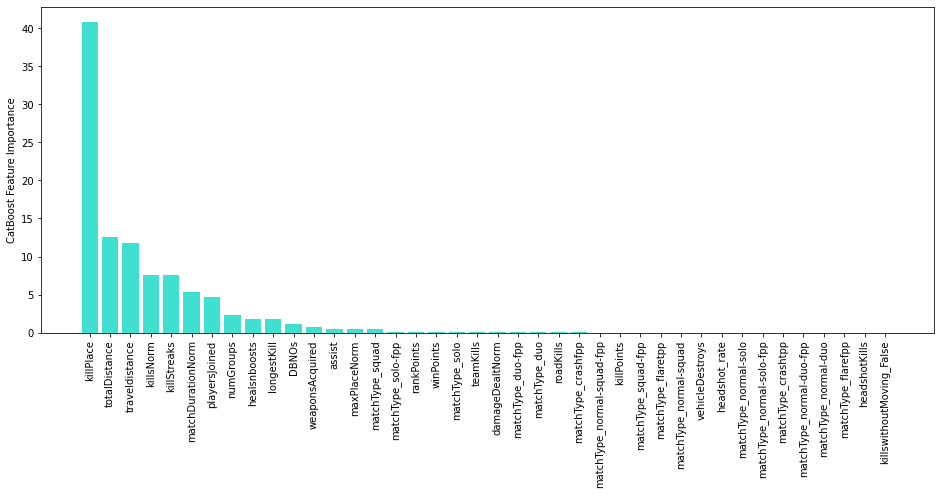

In [54]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

#### Prediction

In [55]:
pred = model.predict(xtest)

In [56]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>